In [ ]:
"""
Problem Set:

In this assignment students will build the random forest model after normalizing the
variable to house pricing from boston data set.
Following the code to get data into the environment:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target


"""

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets


In [9]:
boston= datasets.load_boston()
features=pd.DataFrame(boston.data,columns=boston.feature_names)
# here new feature dataframe is created from the np array data.
targets=boston.target
print(features.shape)
features.head()


(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
# Now we have to standardize the data. We will use StandardScaler from preprocessing

X_train,X_test,y_train,y_test=train_test_split(features,targets,test_size=.25,random_state=18)

scaler= StandardScaler().fit(X_train)

X_train_scaled=pd.DataFrame(scaler.transform(X_train),index=X_train.index.values,columns=X_train.columns.values)

X_test_scaled=pd.DataFrame(scaler.transform(X_test),index=X_test.index.values,columns=X_test.columns.values)

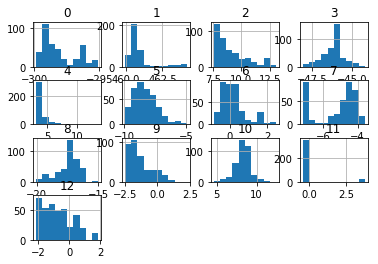

In [19]:
# we can even check if we can reduce dimensionality of dataset using PCA, although here its only 13 features.
# %matplotlib inline
# from sklearn.decomposition import PCA
# pca=PCA()
# pca.fit(X_train)
# foo=pd.DataFrame(pca.transform(X_train))
# x_axis=np.arange(1,pca.n_components_ + 1)
# pca_scaled=PCA()
# pca_scaled.fit(X_train_scaled)
# foo_scaled=pd.DataFrame(pca.transform(X_train_scaled))
# foo_scaled.hist()
# plt.show()

In [55]:
# we will use all regular features in our example here.
# I tried using X_scaled and the results are same.
# import ,instantiate,fit
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=1000,oob_score=True,random_state=18)
# oob_True :whether to use out-of-bag samples to estimate
#    the R^2 on unseen data.is kind of cross-validation
forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=True, random_state=18, verbose=0, warm_start=False)

In [56]:
from sklearn.metrics import r2_score
preds=forest.predict(X_test)
test_score=r2_score(y_test,preds)
print(' R squared score:',test_score)

 R squared score: 0.8678895984068987
